In [193]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
sns.set_style('darkgrid')

In [194]:
ROOT_PATH = "path/to/data"
SAVE_PATH = "path/for/saving"
train_path = os.path.join(ROOT_PATH, "train.csv")
test_path = os.path.join(ROOT_PATH, "test.csv")

In [195]:
df = pd.read_csv(train_path, sep=",", encoding="utf-8")
df.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [196]:
X = df.drop(["id", "Target"], axis=1)
y = df["Target"]
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,0,7,12,6,12.933333,0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,121.0,1,19,1,...,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79
76514,1,1,6,9254,1,1,125.0,1,1,38,...,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12
76515,5,17,1,9085,1,1,138.0,1,37,37,...,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12
76516,1,1,3,9070,1,1,136.0,1,38,37,...,0,0,6,0,0,0.000000,0,7.6,2.6,0.32


[]

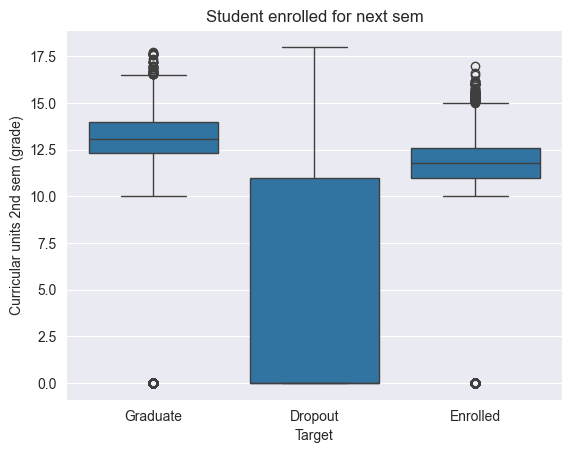

In [197]:
sns.boxplot(df, x='Target',y='Curricular units 2nd sem (grade)')
plt.title('Student enrolled for next sem')
plt.plot()

In [198]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                 

In [199]:
y.unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [200]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.25343684, -0.90242254, -0.52406561, ..., -0.15841825,
        -0.44910992,  0.93317583],
       [-0.25343684,  0.05668196, -0.52406561, ..., -0.15841825,
        -0.44910992,  0.93317583],
       [-0.25343684,  0.05668196,  0.28918253, ...,  1.7636745 ,
        -0.66357837, -0.37269756],
       ...,
       [ 8.80317976,  0.05668196, -0.52406561, ..., -0.79911583,
        -1.44996265, -1.34988173],
       [-0.25343684, -0.90242254,  1.10243066, ..., -1.47750151,
         0.98067968,  0.17807897],
       [-0.25343684, -0.90242254, -0.52406561, ...,  1.49985785,
         1.12365864, -1.76740587]])

In [201]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
y = encoder.fit_transform(y.values.reshape(-1, 1))
y

c:\Users\lucaz\Documents\venvs\.torchvenv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 0, ..., 1, 0, 2])

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [208]:
from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(X, y)

NameError: name 'gblinear' is not defined

In [204]:
X_test_test = pd.read_csv(test_path, sep=",", encoding="utf-8")
print(len(X_test_test))
id_tests = X_test_test["id"].values
X_test_test = X_test_test.drop("id", axis=1)
print(len(X_test_test))
X_test_test = scaler.transform(X_test_test)
print(len(X_test_test))

51012
51012
51012


In [205]:
y_pred = model.predict(X_test)

In [206]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
acc

0.8787898588604286

In [207]:
y_pred_test = model.predict(X_test_test)

print(len(id_tests), len(y_pred_test))
print(len(X_test_test))

le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping)

df_final = pd.DataFrame({"id": id_tests, "Target": y_pred_test})
df_final.loc[df_final["Target"] == 0, "Target"] = 'Dropout'
df_final.loc[df_final["Target"] == 1, "Target"]= 'Enrolled'
df_final.loc[df_final["Target"] == 2, "Target"] = 'Graduate'
df_final.to_csv(SAVE_PATH, index=False)

51012 51012
51012
{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


C:\Users\lucaz\AppData\Local\Temp\ipykernel_10452\1404541800.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Dropout' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_final.loc[df_final["Target"] == 0, "Target"] = 'Dropout'
